# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

#this package looks at all the columns in your dataframe and identifies possible cleaning tasks that need to be done, saving a massive amount of time and code.
from pandas_dq import dq_report as dqr

Imported pandas_dq (1.12). Always upgrade to get latest features.



## Data Overview

- Observations
- Sanity checks

In [2]:
data= pd.read_csv('EasyVisa.csv')

print(data)

data.describe()

print(data.head())

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

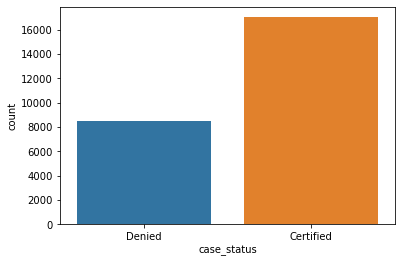

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object


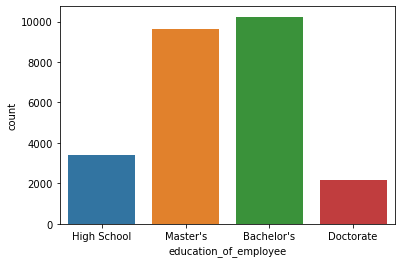

      continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training region_of_employment unit_of_wage  \
0                         N                 West         Hour   
1                         N            Northeast         Year   
2                         Y                 West         Year   
3                  

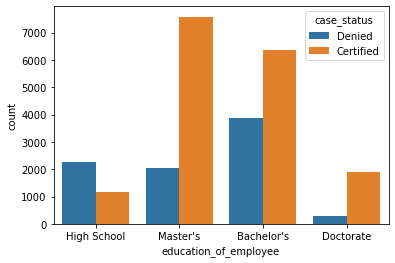

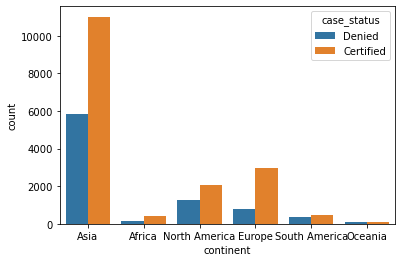

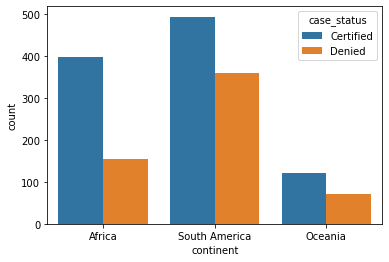

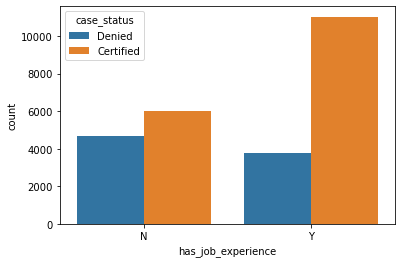

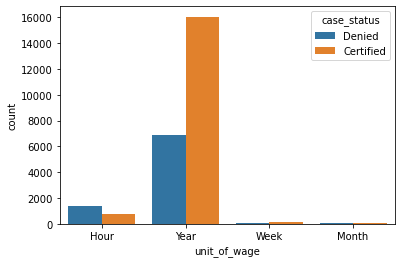

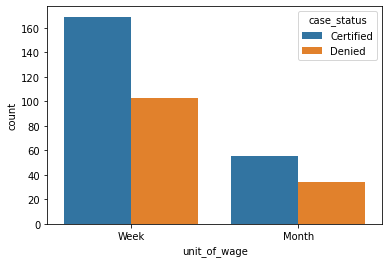

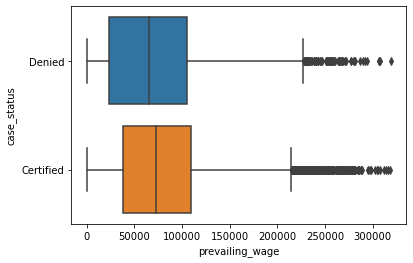

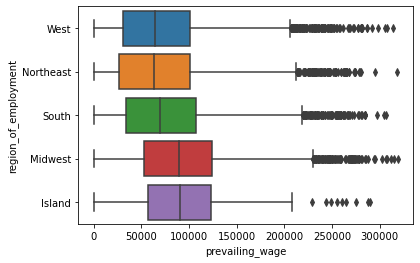

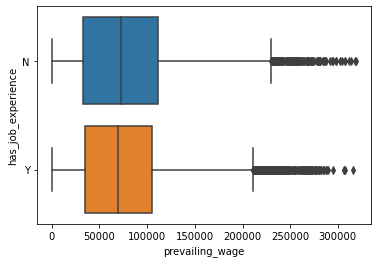

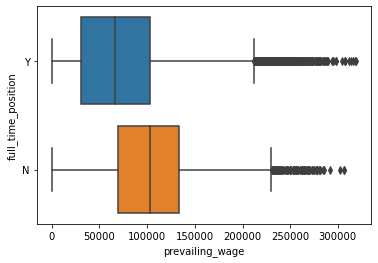

In [3]:
#ccount apporovals and rejections 
sns.countplot(data=data, x='case_status')
plt.show()

print(data.dtypes)

#count how many applicants have each level of education
sns.countplot(data=data, x='education_of_employee')
plt.show()

categorical_columns= ['continent','education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
data2= data[categorical_columns]
print(data2)

# 1 answer question 1
sns.countplot(data=data, x='education_of_employee', hue='case_status')
plt.show()


#2 answer question 2 
sns.countplot(data=data, x='continent', hue='case_status')
plt.show()
data2=data[data['continent'].isin(['Africa','South America', 'Oceania'])]#filter for only continents with a few applications to get better visual comparison

sns.countplot(data=data2, x='continent', hue='case_status')
plt.show()

#3 answer question 3
sns.countplot(data=data, x='has_job_experience', hue='case_status')
plt.show()

#4 answer question 4 
sns.countplot(data=data, x='unit_of_wage', hue='case_status')
plt.show()
data3=data[data['unit_of_wage'].isin(['Week', 'Month'])]#filter for only units of wage with a few applications to get better visual comparison
sns.countplot(data=data3, x='unit_of_wage', hue='case_status')
plt.show()

#5 answer question 5 
sns.boxplot(data=data, x='prevailing_wage', y='case_status')
plt.show()

#Bivariate analysis
sns.boxplot(data=data, x='prevailing_wage', y='region_of_employment')
plt.show()

sns.boxplot(data=data, x='prevailing_wage', y='has_job_experience')
plt.show()

sns.boxplot(data=data, x='prevailing_wage', y='full_time_position')
plt.show()

#### Observations
- 1: Yes education seems to play a role in visa certification. Those with only a highschool education are mostly denied for visas while the number of acceptances only increases with increased education. ie those with a masters have greater acceptance rates than those with a bachelors, and those with a doctorate have greater acceptance rates than those with a master degree.  

- 2: Visa certification rates do fluctuate with europe having the highest rate of acceptance followed by a near even rate for africa and asia.  Oceania has a slighly lower rate of acceptance.  South American is last

- 3: Yes, work experience has a pronounced affect on visa acceptance and vastly increases the chances of being accepted.

- 4: Those with yearly pay rates are the most likely to be accepted while those who whoe are paid by the week and month have slightly lower accpetance rates respectively.  Those who are paid hourly are the only pay rate group that sees the majority of applicants being denied. 

- 5: There is slight variation between that prevailing wages of those accepted for visas and those denied but the differences are minimal.  That being said each category has a number of outliers and we would likely want to investigate this more if doing a deeper analysis on this topic in particular.

Other Results:
- Region of employment shows that island and midwest regions have highest prevailing wages relative to other regions.  this is suprising as one would think that the higest paying jobs would be located in the northeast and west coasts where the largest cities are.
- Those who are not working full time jobs also seem to earn more than those who are wroking in a full time position.  This could be due to contract work and gig economy jobs, which have been on the rise in the past several years and often pay better than full time positions but also have no healthcare/vacation benifits that come with a full time position. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [4]:
#This function looks at each column and row in the dataset and outlines possible cleaning tasks. 
result= dqr(data=data, csv_engine='pandas', verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
case_id,object,0.000000,100,EZYV01,EZYV9999,"Possible ID colum: drop before modeling process., 25480 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 25480 unique values: Use hash encoding or embedding to reduce dimension."
continent,object,0.000000,0,Africa,South America,"3 rare categories: ['South America', 'Africa', 'Oceania']. Group them into a single category or drop the categories."
education_of_employee,object,0.000000,0,Bachelor's,Master's,No issue
has_job_experience,object,0.000000,0,N,Y,No issue
requires_job_training,object,0.000000,0,N,Y,No issue
no_of_employees,int64,0.000000,27,-26,602069,has 1556 outliers greater than upper bound (7227.0) or lower than lower bound(-2701.0). Cap them or remove them.
yr_of_estab,int64,0.000000,0,1800,2016,has 3260 outliers greater than upper bound (2048.5) or lower than lower bound(1932.5). Cap them or remove them.
region_of_employment,object,0.000000,0,Island,West,1 rare categories: ['Island']. Group them into a single category or drop the categories.
prevailing_wage,float64,0.000000,NA,2.136700,319210.270000,has 427 outliers greater than upper bound (218315.56125000003) or lower than lower bound(-76564.56875000002). Cap them or remove them.
unit_of_wage,object,0.000000,0,Hour,Year,"2 rare categories: ['Week', 'Month']. Group them into a single category or drop the categories."


#### Thoughts/ Observations
- The case_id coulmn isnt realy useful for our purposes and therefore should be dropped before using ensemble techniques or modeling.
- We should look at the outliers of our few numeric columns in more detail but also be cafeful not to drop anything that could be important
- There is a business that is said to have -26 employees which is of course impossible. This row should be dropped unless 

In [5]:
#drop case_id
data=data.drop('case_id', axis=1)
print(data)

#invesitgate rows with negative number of employees 
neg_emp=data[data['no_of_employees']<0].count()
print(neg_emp)

      continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y            44444         2008   
3                         N        

#### Observations
- There are 33 rows with negative values for their 'no_of_employees' column. this obviuously doesnt make sense.  In a true business context I would investigate further and reach out to the companies to find out the true number.  In this case I believe the addition of a negative sign may have been an data entry mistake and will simply convert these values from negative to positive. 

In [6]:
#convert negative employee counts to positive using absolute value.
data['no_of_employees']=data['no_of_employees'].apply(abs)

#make sure there are no rows with 0 employees
neg_emp=data[data['no_of_employees']==0].count()

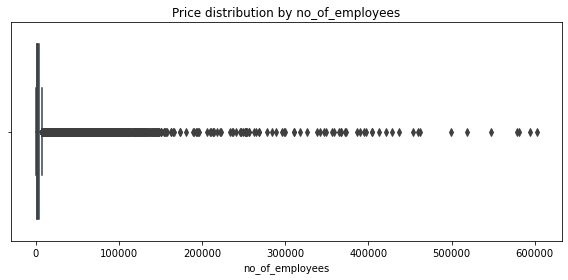

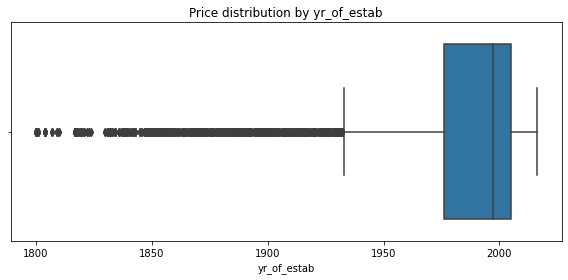

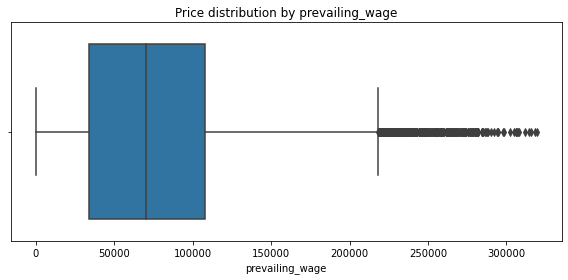

In [7]:
#investigate outliers in numeric columns
numeric_data= data.drop(['continent','education_of_employee','has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage','full_time_position', 'case_status'], axis=1)

#freat a forloop to plot outliers of all numeric variables
for var in numeric_data:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=data, x=var)
    plt.title('Price distribution by {}'.format(var))
    plt.tight_layout() 
plt.show()

#### Observations
- Although each of the numeric columns have numerous outliers, none of these seem to be unreasonable. For example in the number of employees chart we can see that the vast majority of comapnies only have a few employees and large companies with hundreds or thousand of employees are considered oiutliers. This trend extends to the age distrobution of businesses as well.  the majority of businesses are unter 100 years old with outliers being much older. Lastly the majority of prevailing wages are below 225k a year with ouliers making much more.
- Because none of these outliers indicate true errors in the data I am choosing not to drop any of them.

In [8]:
#Split data into train and test groups to prepare for modeling
#convert case status results to binary numeric results
data['case_status']= data['case_status'].apply(lambda x: 1 if x=='Certified' else 0)
print(data)

#creat predictor/responce variables
x=data.drop('case_status', axis=1)
y=data['case_status']

#create dummies for categorical variables
x=pd.get_dummies(x, columns=x.select_dtypes(include=['object']).columns.tolist(), drop_first=True)

print(x)
#split train and test sets based on the proportion of accepted visa applications found in the original dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

      continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y            44444         2008   
3                         N        

In [9]:
#double check that everything looks normal before starting the modeling phase
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (19110, 21)
Shape of test set :  (6370, 21)
Percentage of classes in training set:
1    0.66787
0    0.33213
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


### Functions for Evaluating Models 

##### These functions will calculate common metrics to evaluate the success of ensemble models as well as visualize model results  
* model_performance_classification_sklearn:  Checks model performance. 
* confusion_matrix_sklearn: used to plot the confusion matrix of model results.

In [10]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [11]:
#Define a function that creates a heatmap for the results of the model.  
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [12]:
#Create a decision tree model before moving on to more complex ensemble techniques 
treemodel= DecisionTreeClassifier(criterion='gini', random_state=1)
treemodel.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

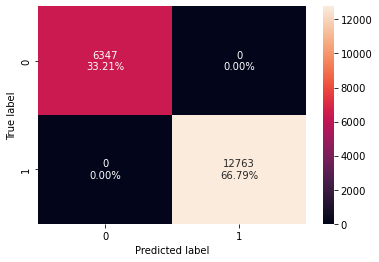

In [13]:
#Visualize Results in a confusion matrix
confusion_matrix_sklearn(treemodel, x_train, y_train)

In [14]:
#create decision tree model on training data 
decision_tree_perf_train = model_performance_classification_sklearn(treemodel, x_train, y_train)
print(decision_tree_perf_train)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


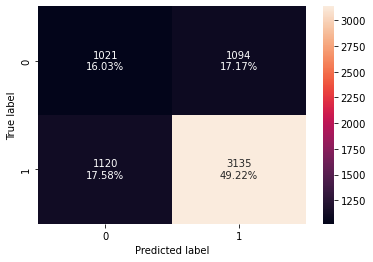

In [15]:
confusion_matrix_sklearn(treemodel, x_test, y_test)

In [16]:
#create decision tree model on testing data 
decision_tree_perf_test = model_performance_classification_sklearn(treemodel, x_test, y_test)
print(decision_tree_perf_test)

   Accuracy   Recall  Precision        F1
0  0.652433  0.73678    0.74131  0.739038


#### Observations
- The training model prefectly predicted the outcomes as is normally the case with an untuned tree.  If we were to expand this tree it would have a huge number of leaves and nodes as we have yet to add hyperparameters.  The testing data results are vasly different from training, indicating overfit model.

#### Tuning Hyperparameters

In [17]:
#Tune hyperparameters by testing numerous different values for max depth, number of leaf samples/ nodes, and minimal impurity values. 
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.711983  0.931599    0.71969  0.812048
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.707064  0.93161   0.715653  0.809475


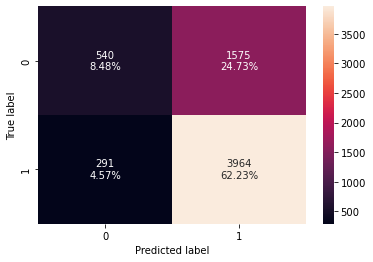

In [18]:
#Calculating different metrics on tuned decision tree models
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,x_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,x_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,x_test,y_test)

#### Observations
- After tuning the hyperparameters, our results for training and testing data are much closer to one another, indicating little overfit.  Our reacll and F1 values are abouve .8 but we can perhaps improve our accuracy and precision scores with more advanced ensemble models. That being said, this is a reasonably strong model. 

### Bagging 

   Accuracy    Recall  Precision        F1
0  0.985139  0.984486   0.993202  0.988825
   Accuracy    Recall  Precision        F1
0   0.69686  0.774618   0.772259  0.773437


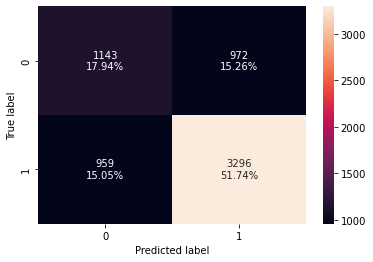

In [19]:
#Create bagging model and fee training and testing data into it
bagging_classifier= BaggingClassifier (random_state=1)
bagging_classifier.fit(x_train, y_train)

bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, x_train, y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, x_test, y_test)
print(bagging_classifier_model_test_perf)

confusion_matrix_sklearn(bagging_classifier, x_test, y_test)

In [20]:
#Tune hyperparameters by testing numerous different values for max depth, number of leaf samples/ nodes, and minimal impurity values.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.992151  0.999138   0.989217  0.994153
   Accuracy    Recall  Precision        F1
0  0.724647  0.866745   0.756513  0.807886


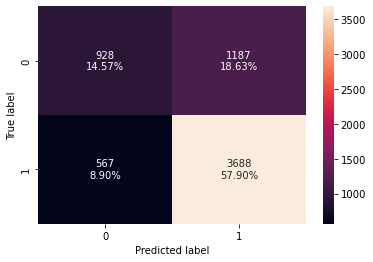

In [21]:
#Calculating different metrics for training and testing data with tuned model 
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,x_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,x_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, x_test,y_test)

#### Observation
- The hyperparameter tuning did imporove our results to a reasonable degree, with increases in the accuracy, recall and F1 measurement, however there is still significant overfitting even with the hyperparameters in place.
- Precision was the only measure that didnt increase, but it showed only a minimal loss.

### Random Forest 

   Accuracy  Recall  Precision        F1
0  0.999948     1.0   0.999922  0.999961
   Accuracy    Recall  Precision        F1
0  0.721507  0.840423   0.765575  0.801255


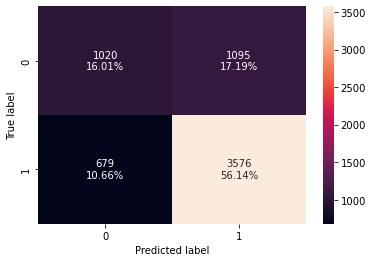

In [22]:
#Create RF model and feed training and testing data into it
rf_classifier= RandomForestClassifier(random_state=1)
rf_classifier.fit(x_train, y_train)

rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_classifier, x_train, y_train)
print(rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_classifier, x_test, y_test)
print(rf_estimator_model_test_perf)

confusion_matrix_sklearn(rf_classifier, x_test, y_test)

#### Observations
- 

#### Hyperparameter Tuning

In [23]:
#Tune hyperparameters by testing numerous different values for max depth, number of leaf samples/ nodes, and minimal impurity values.
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)


#here is increased the number of estimators range as the previous values were returning 
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(50, 201, 50),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=200, oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.775144  0.904176   0.789654  0.843043
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.741915  0.884371   0.765615  0.82072


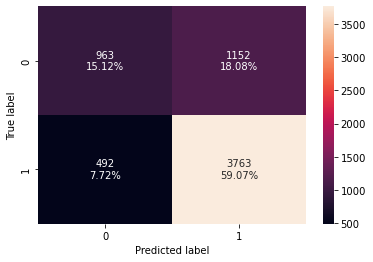

In [24]:
#Calculating different metrics for training and testing data with tuned model 
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,x_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,x_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,x_test,y_test)

## Boosting 

### Ada Boosting

   Accuracy  Recall  Precision        F1
0  0.999948     1.0   0.999922  0.999961
   Accuracy    Recall  Precision        F1
0  0.721507  0.840423   0.765575  0.801255


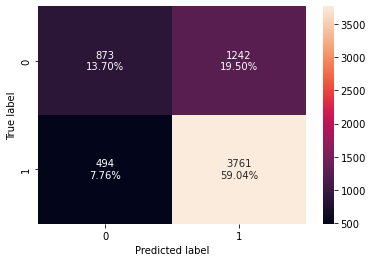

In [25]:
#Create Ada boosting model and feed training and testing data into it.
abc_classifier = AdaBoostClassifier(random_state=1)
abc_classifier.fit(x_train, y_train)

ab_classifier_model_train_perf = model_performance_classification_sklearn(rf_classifier, x_train, y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(rf_classifier, x_test, y_test)
print(ab_classifier_model_test_perf)

confusion_matrix_sklearn(abc_classifier, x_test, y_test)

#### Hyperparameter tuning  (Ada Boost)

In [26]:
#Tune hyperparameters by testing numerous different values for max depth, number of leaf samples/ nodes, and minimal impurity values.
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.719362  0.780224   0.795622  0.787848
   Accuracy    Recall  Precision        F1
0  0.715228  0.783549   0.788739  0.786135


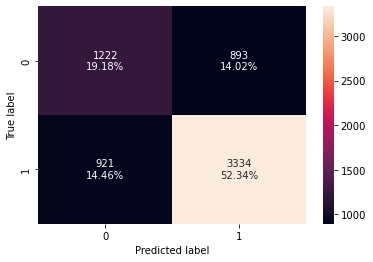

In [27]:
#Calculating different metrics for training and testing data with tuned model 
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,x_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,x_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,x_test,y_test)

#### Observations
- Our initial ADA boosting model returns a strong training performance that was alomost perfect (all metrics at or equal to 1) but the testing performance was much lower, indicating overfitting.
- The tuned model has reasonable performance with all metrics between 0.7-0.8.  the training and testing results of the tuned model are almost exacly the same, indicating the overfitting in the origional model was removed.



### Gradient Boosting 

   Accuracy    Recall  Precision        F1
0  0.759236  0.881454   0.784628  0.830228
   Accuracy    Recall  Precision        F1
0  0.740502  0.873325   0.769358  0.818052


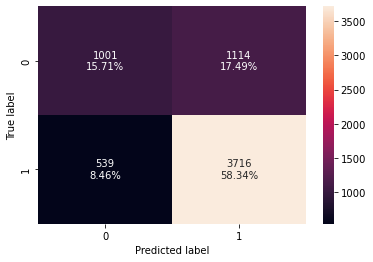

In [28]:
#Create a gradient boosting model and fee training and testing data into it.
gb_classifier= GradientBoostingClassifier(random_state=1)
gb_classifier.fit(x_train, y_train)

gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, x_train, y_train)
print(gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, x_test, y_test)
print(gb_classifier_model_test_perf)

confusion_matrix_sklearn(gb_classifier, x_test, y_test)

#### Hyperparameter tuning (Gradient Boosting)

In [29]:
#Tune hyperparameters by testing numerous different values for max depth, number of leaf samples/ nodes, and minimal impurity values.
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5) 
grid_obj = grid_obj.fit(x_train, y_train) 

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

   Accuracy    Recall  Precision        F1
0  0.765515  0.879809   0.792113  0.833661
   Accuracy    Recall  Precision        F1
0   0.74113  0.870505   0.771345  0.817931


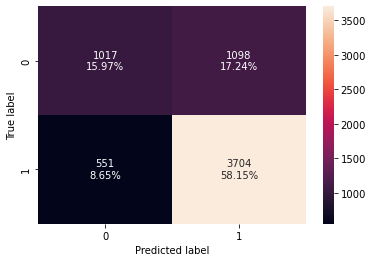

In [30]:
#Calculating different metrics for training and testing data with tuned model 
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,x_train,y_train)
print(gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,x_test,y_test)
print(gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,x_test,y_test)

#### Observations
- Our initial gradient boosting model returned training and testing results that were close to one another.  This was suprising as typically and untuned model will have overfitting, which wasnt the case in this model.
- The tuned model had values almost exactly the same as the original gradient boosting model.  This is interesting as well as tuning often results in a better model.  This could be due to the fact that gradient boosing models take the residuals in the first model and sequentially addressing them with a new model.   

### XG Boost 

   Accuracy    Recall  Precision        F1
0  0.835531  0.927368     0.8423  0.882789
   Accuracy   Recall  Precision        F1
0  0.732025  0.86228   0.765971  0.811277


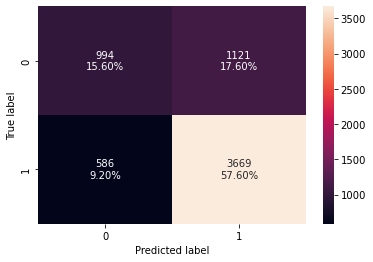

In [31]:
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(x_train, y_train)

xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, x_train, y_train)
print(xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, x_test, y_test)
print(xgb_classifier_model_test_perf)

confusion_matrix_sklearn(xgb_classifier, x_test, y_test)

#### Hyperparameter Tuning (XG Boost)

In [32]:
#Tune hyperparameters by testing numerous different values for max depth, number of leaf samples/ nodes, and minimal impurity values.
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
xgb_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5) 
grid_obj = grid_obj.fit(x_train, y_train) 

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

   Accuracy    Recall  Precision       F1
0  0.768707  0.882551   0.794078  0.83598
   Accuracy   Recall  Precision        F1
0  0.741601  0.87074   0.771714  0.818242


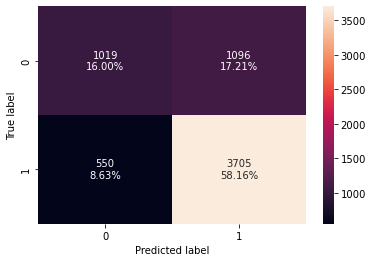

In [33]:
#Calculating different metrics for training and testing data with tuned model 
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,x_train,y_train)
print(xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,x_test,y_test)
print(xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,x_test,y_test)

#### Observations
- The initial untuned XGB model was overfit while the tuned model performed well and did not indicate a great deal of overit between the training and testing data.

### Stacking previous classifiers (Adaboost, Gradient boost, Random Forest)

   Accuracy    Recall  Precision        F1
0  0.772998  0.885528   0.797094  0.838987
   Accuracy   Recall  Precision        F1
0  0.743328  0.87168    0.77303  0.819397


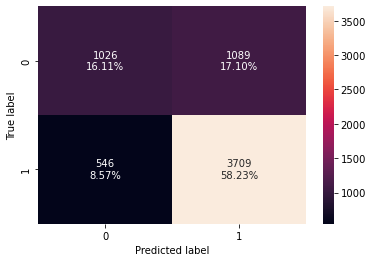

In [34]:
#this code will combine several of our previous tuned models into a stacked model
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier =  StackingClassifier(estimators=estimators,final_estimator=final_estimator) ## Complete the code to define Stacking Classifier
stacking_classifier.fit(x_train, y_train) ## Complete the code to fit Stacking Classifier on the train data

stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, x_train, y_train)
print(stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, x_test, y_test)
print(stacking_classifier_model_test_perf)

confusion_matrix_sklearn(stacking_classifier, x_test, y_test)

#### Observation
- The stacked model performed well and had results similar to many of the other strong models above.

## Compare Model Results

In [35]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.711983,0.985139,0.992151,0.999948,0.775144,0.999948,0.719362,0.759236,0.765515,0.835531,0.768707,0.772998
Recall,1.0,0.931599,0.984486,0.999138,1.000000,0.904176,1.000000,0.780224,0.881454,0.879809,0.927368,0.882551,0.885528
Precision,1.0,0.719690,0.993202,0.989217,0.999922,0.789654,0.999922,0.795622,0.784628,0.792113,0.842300,0.794078,0.797094
F1,1.0,0.812048,0.988825,0.994153,0.999961,0.843043,0.999961,0.787848,0.830228,0.833661,0.882789,0.835980,0.838987


In [36]:
#testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,      
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652433,0.707064,0.696860,0.724647,0.721507,0.741915,0.721507,0.715228,0.740502,0.741130,0.732025,0.741601,0.743328
Recall,0.736780,0.931610,0.774618,0.866745,0.840423,0.884371,0.840423,0.783549,0.873325,0.870505,0.862280,0.870740,0.871680
Precision,0.741310,0.715653,0.772259,0.756513,0.765575,0.765615,0.765575,0.788739,0.769358,0.771345,0.765971,0.771714,0.773030
F1,0.739038,0.809475,0.773437,0.807886,0.801255,0.820720,0.801255,0.786135,0.818052,0.817931,0.811277,0.818242,0.819397


#### Observation 
- The tuned random forest performed quite well despite being one of the simpler models we tested.  I would have assumed that similar models woulc score lower
- Gradient Boost classifier performed well (the tuned model also perormed almost the same which is similar)
- Tuned xgboost performed well (tuned model better as it didnt have overfit)
- Stacking model did well
- It is very difficult to select a 'best' model from these results as there are a number of models that performed well and acored similarly across Accuracy, Recall, Precision, and F1 scores.  That beind said, it appears that the tuned gradient boost, tuned XGboost, tuned random forest, and stacking model are all in contention for the best model.  Each of them shows minimal overfit on training vs testing data and shows similar performance across all four performance metrics. 

### Feature Importance

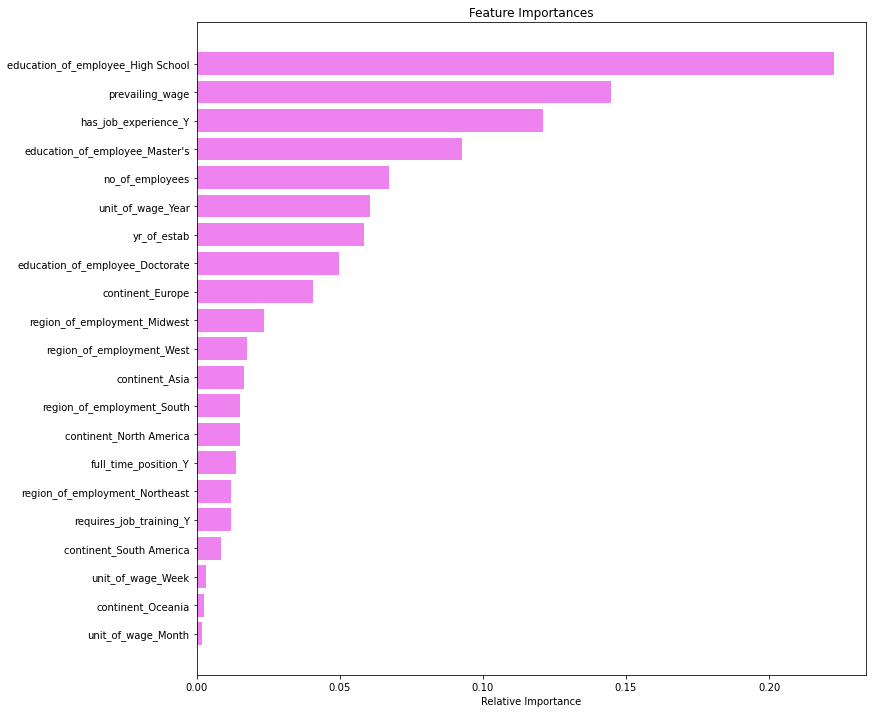

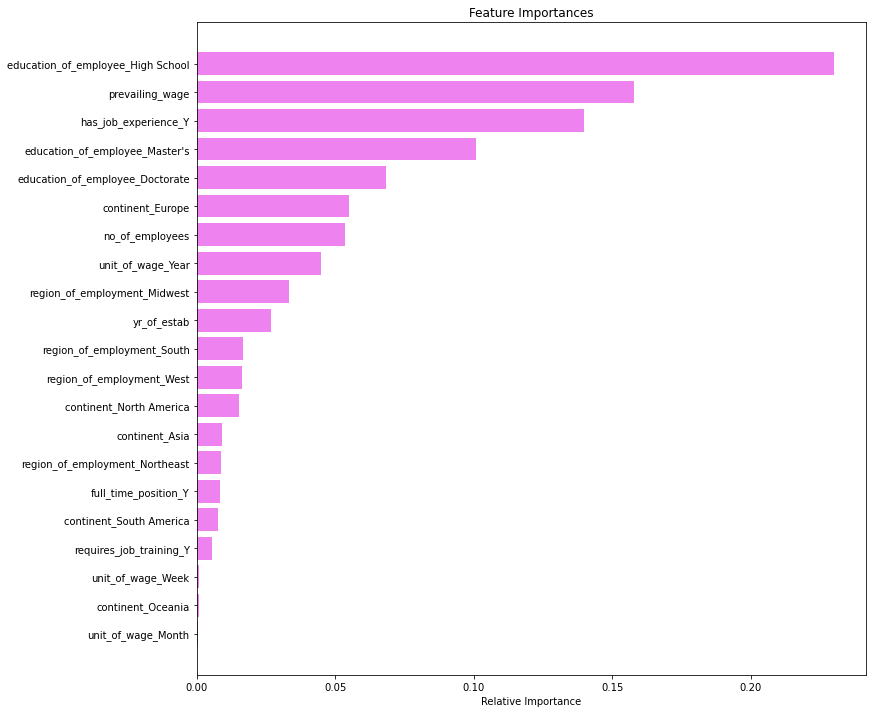

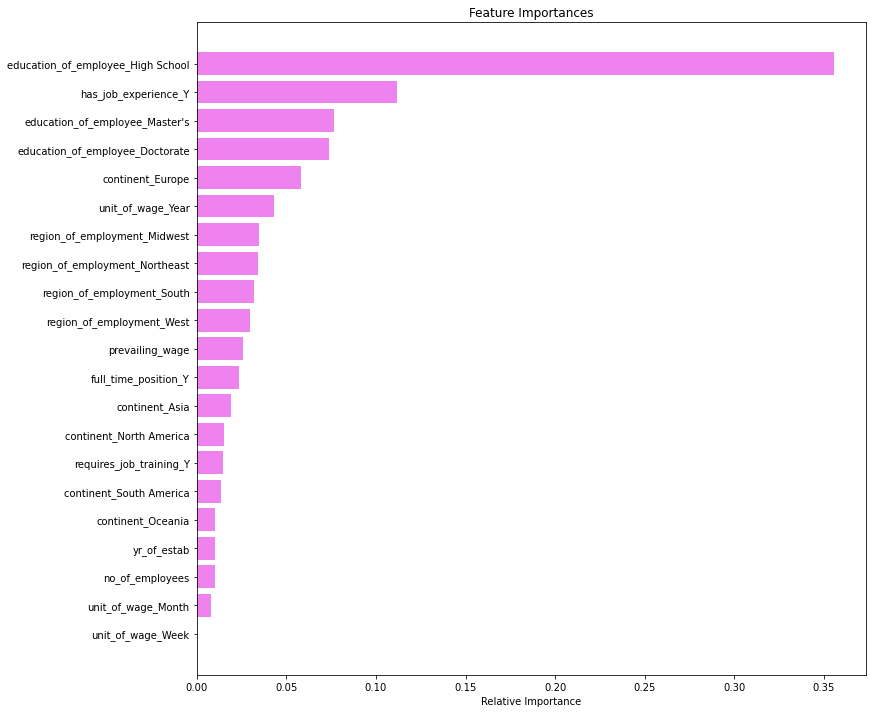

In [37]:
#Feature importance (Random Forest tuned model)
feature_names = x_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Feature importance (Gradient Boost tuned model)
feature_names = x_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


#Feature importance (XGBoost tuned model)
feature_names = x_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


#### Observations (for tuned random forest model: change later to best model)
- Here we can take a look at the features or variables that are predicted to have the greatest importance with regard to predictiong visa approval. 
- We can see that education level (high school/ Masters/Doctorate), prevailing wage, and whether or not you come from europe show dignificant feature importance in each of our most successful models


## Actionable Insights and Recommendations

#### Goals:
* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

#### Insight:
Our analysis revealed several interesting pieces of information that could be used to either cut down the number of visa applicants or better fast track cadidates that are more qualified.  To address particular parameters, education level (high school/ Masters/Doctorate), prevailing wage, continent of origin, and region of employment were show to be important factors in determining who is granted a visa (In all of our best performing models). In order to minimize applications the US could adopt some of the following practices

- Require a certain base level of education in order to apply for a visa.
- Require previous work experience inorder to apply for a visa.
- Require a certain historical wage or prove a minimum amount of savings in order to apply for a visa.
- Set a limit on the number of visas that can be granted to people from each continent or country and cut off applications beyond that number.
- Set a limit on the number of visas that can be granted for employment in each region of the US. 
    - For example the US could create a rule that 10000 yearly visas can be granted to foreigners applying for visas in the northeastern states, 5000 in the southwestern states, etc...  

I am not necessarily advocating for any of these methods and believe they could be applied in an unfair manner. I am simply acknowledging that they could help reduce the number of visas granted. 

If the goal isnt to reduce the total number of visa applications and simply to fasttrack applicats who are mostly likely to be approved the Office of Foreign Labor Certification (OFLC) could use one of our models to predict those who are well qualified and evaluate those candidates first.  While we have several models with fairly similar results, the tuned random forest model is likely the the strongest as it maximizes recall and F1 values.  Based on the results of this model we can predict which candidates will be approved for a visa within approx 75-80% accuracy, saving the OFLC time and money in their vetting process.  